## Introducción al Machine Learning
### Ejercicios con árboles de decisión

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

En este notebook seguimos con el problema del Iris. Este consiste en clasificar plantas de la especie *Iris* en tres subespecies: *iris-virginica*, *iris-setosa* e *iris-versicolor*. Los atributos que describen cada planta son las dimensiones (longitud y anchura) del pétalo y el sépalo. El conjunto de datos contiene un total de 150 plantas, 50 de cada una de las clases.

En la siguiente celda cargamos los datos del problema, que están incluidos en el paquete *sklearn.datasets*. En este enlace tienes una descripción de los datos:

https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

La variable ``iris`` es un diccionario con los siguientes elementos:

- ``data``: array de numpy con los datos del problema (no incluye la clase). Cada fila es un ejemplo (150), cada columna es un atributo (4).
- ``target``: array de numpy con las clases de los 150 ejemplos, cada clase es un número entre 0 y 2.
- ``target_names``: array de numpy con los nombres de las 3 clases.
- ``DESCR``: string con una descripción del problema.
- ``feature_names``: lista con los nombres de los 4 atributos.
- ``filename``: nombre del fichero que contiene los datos.

Creamos un DataFrame con los datos para que sea más fácil visualizarlos:

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target_names[iris.target]
df['target_num'] = iris.target
df[::10].head(15)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_num
0,5.1,3.5,1.4,0.2,setosa,0
10,5.4,3.7,1.5,0.2,setosa,0
20,5.4,3.4,1.7,0.2,setosa,0
30,4.8,3.1,1.6,0.2,setosa,0
40,5.0,3.5,1.3,0.3,setosa,0
50,7.0,3.2,4.7,1.4,versicolor,1
60,5.0,2.0,3.5,1.0,versicolor,1
70,5.9,3.2,4.8,1.8,versicolor,1
80,5.5,2.4,3.8,1.1,versicolor,1
90,5.5,2.6,4.4,1.2,versicolor,1


En esta ocasión, vamos a intentar visualizar la distribución de nuestros datos. Para ello, vamos a utilizar la librería Seaborn para visualizar, concretamente la función `pairplot`. Con esta función, podemos representar por pares la distribución de nuestros puntos, con la comodidad de que podemos indicar que dibuje cada clase de un color diferente.

Como vemos el problema no es muy complicado. Una de las clases (setosa) está completamente separada de las otras dos. Las dos últimas solapan ligeramente.

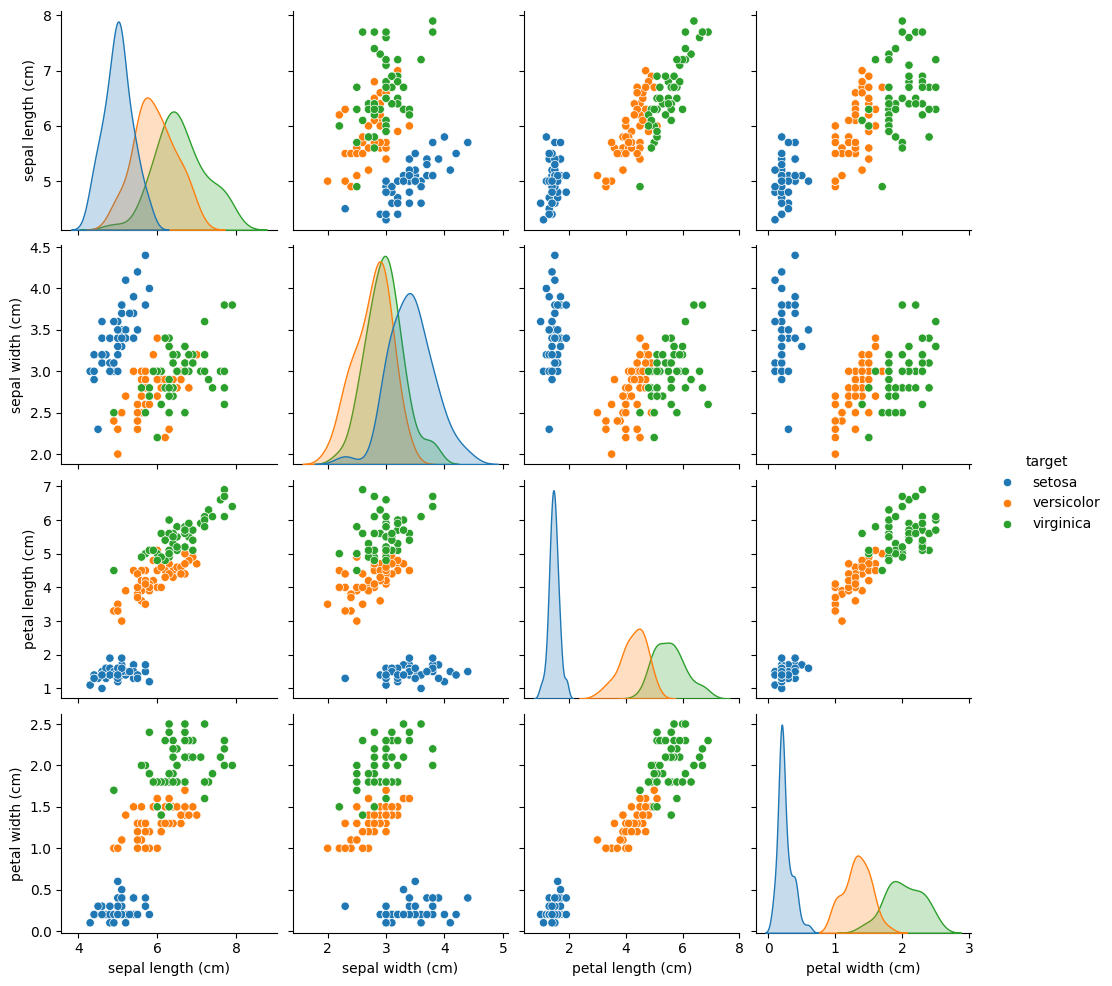

In [ ]:
sns.pairplot(df.drop("target_num", axis=1), hue="target")
plt.show()

Vamos a preparar los datos de entrada y salida:

In [6]:
x = iris.data
y = iris.target

In [7]:
print(x.shape, y.shape)

(150, 4) (150,)


#### ¿Cómo funciona un árbol de decisión?
Estudiar el resultado utilizando la implementación de un árbol de decisión en sklearn:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [9]:
dTree = DecisionTreeClassifier(max_depth=2)
_ = dTree.fit(x, y)

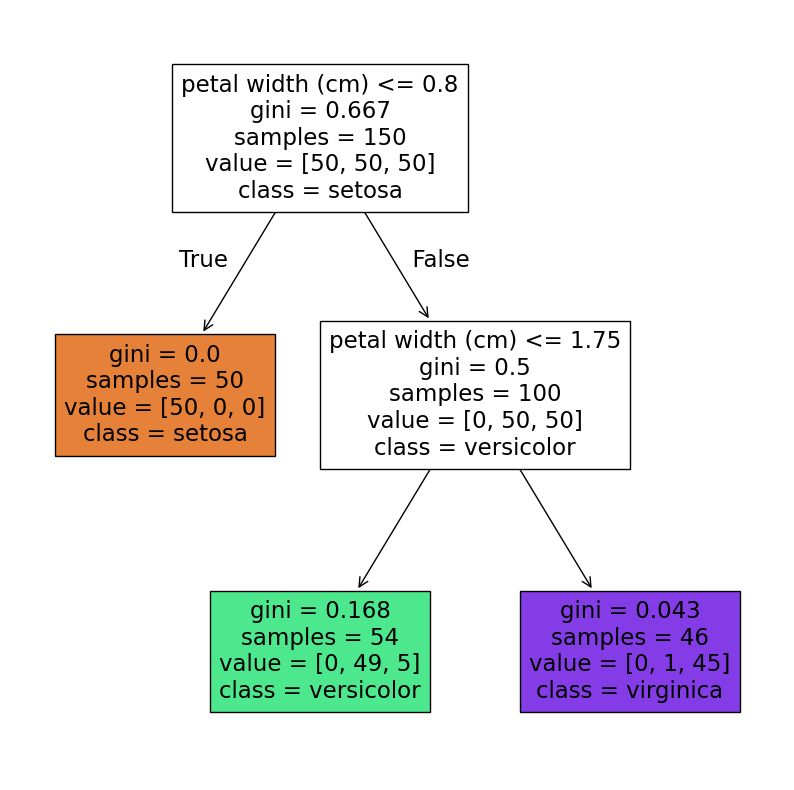

In [10]:
plt.figure(figsize=(10,10))
plot_tree(dTree,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True
          )
plt.show()

In [11]:
dTree.score(x,y)

0.96